In [67]:
import numpy as np
import pandas as pd
import geopandas as gpd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_spss("../data/032017_bddEnemdu_SPSS/201703_EnemduBDD_15anios.sav")

In [3]:
df2 = pd.read_spss("../data/201706_EnemduBDD_SPSS/201706_EnemduBDD_15anio.sav.sav")

In [4]:
df3 = pd.read_spss("../data/201712_EnemduBDD_15anios/201712_EnemduBDD_15anios.sav")

In [5]:
df4 = pd.read_spss("../data/201709_EnemduBDD_15anios.sav")

In [6]:
extranjeros = df.loc[df['p17a'] == 'En otro país', 'p18']
extranjeros

21       Se vino con la familia
22       Se vino con la familia
217                 Por trabajo
228                 Por trabajo
229                 Por trabajo
                  ...          
56600    Se vino con la familia
56708               Por trabajo
56761                Matrimonio
58270               Por trabajo
59204               Por trabajo
Name: p18, Length: 1187, dtype: category
Categories (8, object): ['Compró o le dieron casa o terreno', 'Estudio', 'Matrimonio', 'Otro, cual', 'Para mejorar ingresos', 'Por trabajo', 'Salud o enfermedad', 'Se vino con la familia']

In [7]:
datos = df[[
    'area','ciudad','zona', 'sector',  'vivienda', 'p01', 'p02', 'p03',
    'p06', 'p07', 'p10a', 'p17a', 'p18', 'p34', 'p45', 'SECEMP', 
    'grupo1', 'rama1', 'empleo', 'sub', 'petn', 'pean', 'desem',
    'sub_w', 'oinad', 'ced01a', 'ingrl', 'p50', 'p38', 'p36', 'p35', 'p15',
    'p51c', 'ingpc','p24'
]]
datos2 = df2[[
    'area','ciudad','zona', 'sector',  'vivienda', 'p01', 'p02', 'p03',
    'p06', 'p07', 'p10a', 'p17a', 'p18', 'p34', 'p45', 'SECEMP', 
    'grupo1', 'rama1', 'empleo', 'sub', 'petn', 'pean', 'desem',
    'sub_w', 'oinad', 'ced01a', 'ingrl', 'p50', 'p38', 'p36', 'p35', 'p15',
    'p51c', 'ingpc','p24'
]]
datos3 = df3[[
    'area','ciudad','zona', 'sector',  'vivienda', 'p01', 'p02', 'p03',
    'p06', 'p07', 'p10a', 'p17a', 'p18', 'p34', 'p45', 'SECEMP', 
    'grupo1', 'rama1', 'empleo', 'sub', 'petn', 'pean', 'desem',
    'sub_w', 'oinad', 'ced01a', 'ingrl', 'p50', 'p38', 'p36', 'p35', 'p15',
    'p51c', 'ingpc','p24'
]]
datos4 = df4[[
    'area','ciudad','zona', 'sector',  'vivienda', 'p01', 'p02', 'p03',
    'p06', 'p07', 'p10a', 'p17a', 'p18', 'p34', 'p45', 'SECEMP', 
    'grupo1', 'rama1', 'empleo', 'sub', 'petn', 'pean', 'desem',
    'sub_w', 'oinad', 'ced01a', 'ingrl', 'p50', 'p38', 'p36', 'p35', 'p15',
    'p51c', 'ingpc','p24'
]]

In [8]:
datos=datos.append([datos2, datos3, datos4])

<ipython-input-8-86b6cc59a940>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datos=datos.append([datos2, datos3, datos4])


In [9]:
datos.rename(columns = {'p01':'persona', 'p02':'genero', 'p03':'edad',
                       'p06':'estado_civil', 'p07':'asiste_clases',
                       'p10a':'nivel_instruccion', 'p17a':'extranjero',
                       'p18':'razon_emigracion', 'p34':'razon_no_busco_trabajo',
                       'p45':'anios_trabajando', 'SECEMP':'sector_empleado',
                       'grupo1':'grupo_ocupacion', 'rama1':'rama_actividad',
                       'petn':'edad_trabajar', 'pean':'econom_activa',
                       'desem':'desempleo', 'sub_w':'sub_pocos_ingresos',
                       'oinad':'emp_no_pleno', 'ced01a': 'cedula', 'ingrl':'ingresos_trabajo',
                       'p50':'num_trabajos', 'p38':'mot_dejo_trab', 'p36':'trab_sem_pasada',
                       'p35':'desea_trab', 'p15':'raza', 'p51c':'horas_trab'}, inplace = True)

In [10]:
parr = gpd.read_file("../data/SHP/nxparroquias.shp")

In [11]:
parr['DPA_PARROQ'] = parr['DPA_PARROQ'].astype('int')

In [12]:
region = datos.merge(parr, left_on = "ciudad", right_on = "DPA_PARROQ")

In [13]:
region.head()

area   ciudad zona sector      vivienda    persona  genero  edad  \
0  Urbana  10150.0  001    003  Vivienda Uno  Persona 1  Hombre  54.0   
1  Urbana  10150.0  001    003  Vivienda Uno  Persona 2   Mujer  53.0   
2  Urbana  10150.0  001    003  Vivienda Uno  Persona 3   Mujer  15.0   
3  Urbana  10150.0  001    003  Vivienda Dos  Persona 1   Mujer  51.0   
4  Urbana  10150.0  001    003  Vivienda Dos  Persona 2  Hombre  47.0   

  estado_civil asiste_clases  ...   p24 DPA_PARROQ DPA_DESPAR DPA_VALOR  \
0    Casado(a)            No  ...  40.0      10150     CUENCA         0   
1    Casado(a)            No  ...  40.0      10150     CUENCA         0   
2   Soltero(a)            Si  ...   NaN      10150     CUENCA         0   
3  Unión libre            No  ...  24.0      10150     CUENCA         0   
4  Unión libre            No  ...  35.0      10150     CUENCA         0   

   DPA_ANIO DPA_CANTON DPA_DESCAN DPA_PROVIN DPA_DESPRO  \
0      2012       0101     CUENCA         01      AZUAY   
1      2012       0101     CUENCA         01      AZUAY   
2      2012       0101     CUENCA         01      AZUAY   
3      2012       0101     CUENCA         01      AZUAY   
4      2012       0101     CUENCA         01      AZUAY   

                                            geometry  
0  POLYGON ((724179.847 9687634.625, 724188.327 9...  
1  POLYGON ((724179.847 9687634.625, 724188.327 9...  
2  POLYGON ((724179.847 9687634.625, 724188.327 9...  
3  POLYGON ((724179.847 9687634.625, 724188.327 9...  
4  POLYGON ((724179.847 9687634.625, 724188.327 9...  

[5 rows x 44 columns]

In [14]:
parr['DPA_DESPRO'].nunique()

25

In [15]:
datos = datos.loc[datos['ingresos_trabajo']!="Gasta mas de lo que gana"]
datos = datos.loc[datos['ingresos_trabajo']!="No informa"]

In [16]:
datos['ingresos_trabajo'] = datos['ingresos_trabajo'].astype('float')

In [17]:
datos['ingresos_trabajo'].dtype

dtype('float64')

In [18]:
datos['ingpc']

0        494.0
1        494.0
2        494.0
3        352.0
4        352.0
         ...  
57324    166.5
57325    207.0
57326    207.0
57327    265.0
57328    728.0
Name: ingpc, Length: 283122, dtype: float64

In [39]:
q1 = region['ingpc'].quantile(0.25)
q3 = region['ingpc'].quantile(0.75)
iqr = q3 - q1
region = region.loc[~((region["ingpc"] > (q3 + (1.5*iqr))) | (region["ingpc"] < (q1 - (1.5*iqr)))),:] = region.loc[~((region["ingpc"] > (q3 + (1.5*iqr))) | (region["ingpc"] < (q1 - (1.5*iqr)))),:]

<ipython-input-39-c904fb35ce95>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-39-c904fb35ce95>:4: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



In [40]:
prov_ing = region.groupby('DPA_DESPRO')['ingpc'].mean().sort_values(ascending=True).reset_index()
prov_ing.head()

DPA_DESPRO       ingpc
0                NAPO  113.309391
1            ORELLANA  123.992678
2  ZONA NO DELIMITADA  131.510158
3           SUCUMBIOS  132.091098
4    ZAMORA CHINCHIPE  132.247297

In [41]:
prov_emp = region.groupby('DPA_DESPRO')[['empleo', 'desempleo']].count().reset_index()
prov_emp.head()

DPA_DESPRO  empleo  desempleo
0       AZUAY    6839        323
1     BOLIVAR    3532         68
2      CARCHI    3622        203
3       CAÑAR    3314        133
4  CHIMBORAZO    4062         95

In [42]:
prov_emp['tasa_desempleo'] = (prov_emp['desempleo'] / (prov_emp['empleo'] + prov_emp['desempleo'] )) * 100

In [43]:
prov_emp['tasa_empleo'] = 100 - prov_emp['tasa_desempleo']

In [44]:
prov_emp = prov_emp.sort_values(ascending=True, by='tasa_desempleo')

In [45]:
px.bar(prov_ing, x='ingpc', y='DPA_DESPRO', color='ingpc', title="Ingreso per capita por provincia", labels={'DPA_DESPRO':'Provincias', 'ingresos_trabajo': 'Ingreso promedio'})

In [46]:
# sns.catplot(dat, x='ingpc', y='DPA_DESPRO', kind="box", height=8, aspect=1.5,
#            order = ['NAPO', 'ZAMORA CHINCHIPE', 'SUCUMBIOS', 'ORELLANA', 'ESMERALDAS',
#                     'CARCHI', 'MORONA SANTIAGO', 'CHIMBORAZO', 'BOLIVAR', 'SANTA ELENA', 'PASTAZA', 
#                     'ZONA NO DELIMITADA', 'LOS RIOS', 'MANABI', 'COTOPAXI', 'LOJA', 'CAÑAR', 'IMBABURA', 
#                     'SANTO DOMINGO DE LOS TSACHILAS', 'EL ORO', 'GUAYAS', 'TUNGURAHUA','AZUAY', 'PICHINCHA'])

In [47]:
px.bar(prov_emp, y='DPA_DESPRO',x='tasa_desempleo', color='tasa_desempleo')

In [48]:
datos['raza']

0         Mestizo
1         Mestizo
2         Mestizo
3         Mestizo
4         Mestizo
           ...   
57324     Mestizo
57325     Mestizo
57326     Mestizo
57327     Mestizo
57328    Montubio
Name: raza, Length: 283122, dtype: category
Categories (8, object): ['Afroecuatoriano', 'Blanco', 'Indígena', 'Mestizo', 'Montubio', 'Mulato', 'Negro', 'Otro, cual']

In [49]:
trabajando = datos.loc[datos['empleo'].isna() == False]

In [50]:
trabajando['ingresos_trabajo']

0        1072.0
1         410.0
3         120.0
4         320.0
5         360.0
          ...  
57323     528.0
57324     110.0
57325     380.0
57326      34.0
57328     728.0
Name: ingresos_trabajo, Length: 132627, dtype: float64

In [51]:
q1 = trabajando['ingresos_trabajo'].quantile(0.25)
q3 = trabajando['ingresos_trabajo'].quantile(0.75)
iqr = q3 - q1

In [52]:
trabajando = trabajando.loc[~((trabajando["ingresos_trabajo"] > (q3 + (1.5*iqr))) | (trabajando["ingresos_trabajo"] < (q1 - (1.5*iqr)))),:]

In [93]:
inst_emp = datos.groupby('nivel_instruccion')[['econom_activa', 'desempleo']].count().reset_index()
inst_emp['tasa_desempleo'] = (inst_emp['desempleo'] / inst_emp['econom_activa']) * 100
inst_emp = inst_emp.sort_values(ascending=False, by='tasa_desempleo')
inst_emp

nivel_instruccion  econom_activa  desempleo  tasa_desempleo
1           Educación  Media          13746       1421       10.337553
7     Superior Universitario          24077       1500        6.230012
8  Superior no universitario           2816        167        5.930398
2           Educación Básica           6821        338        4.955285
6                 Secundaria          39642       1548        3.904949
4                 Post-grado           2338         67        2.865697
5                   Primaria          43510        771        1.772006
0   Centro de alfabetización            698          9        1.289398
3                    Ninguno           4836         36        0.744417

In [94]:
px.bar(inst_emp, x='tasa_desempleo', y='nivel_instruccion', color='nivel_instruccion', title="Tasa de desempleo por nivel de instrucción", labels={'nivel_instruccion':'Nivel de instrucción', 'tasa_desempleo': 'Tasa de desempleo'})

In [53]:
fig = px.box(trabajando, y = 'ingresos_trabajo', facet_col="nivel_instruccion", title = 'Salario por nivel de instrucción',
             category_orders={"nivel_instruccion": ["Ninguno", "Centro de alfabetización", "Educación Básica", "Primaria",'Educación  Media', "Secundaria", "Superior no universitario", "Superior Universitario", "Post-grado"]})

fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_layout(autosize=False,width=1450,height=500)

In [54]:
fig = px.box(trabajando, y = 'ingresos_trabajo', facet_col="raza", title = 'Salario por raza',
             category_orders={"raza": ["Mestizo", "Blanco", "Indígena", "Negro",'Afroecuatoriano', "Mulato", "Montubio", "Otro, cual"]})
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

In [55]:
fig = px.box(trabajando.loc[(trabajando['nivel_instruccion'] == 'Ninguno')|
                            (trabajando['nivel_instruccion'] == 'Primaria')|
                            (trabajando['nivel_instruccion'] == 'Secundaria')], 
             y = 'ingresos_trabajo', facet_col="raza", facet_row = 'nivel_instruccion', 
             title="Sin título de tercer o cuarto nivel", color="raza",
            category_orders={"raza": ["Mestizo", "Blanco", "Indígena", "Negro",'Afroecuatoriano', "Mulato", "Montubio", "Otro, cual"],
                            "nivel_instruccion": ["Ninguno", "Primaria", "Secundaria"]})
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_layout(autosize=False,width=1200,height=1000)

In [56]:
fig = px.box(trabajando.loc[(trabajando['nivel_instruccion'] == 'Superior no universitario')|
                            (trabajando['nivel_instruccion'] == 'Superior Universitario')|
                            (trabajando['nivel_instruccion'] == 'Post-grado')], 
             y = 'ingresos_trabajo', facet_col="raza", facet_row = 'nivel_instruccion',
             title="Con título de tercer o cuarto nivel", color="raza",
            category_orders={"raza": ["Mestizo", "Blanco", "Indígena", "Negro",'Afroecuatoriano', "Mulato", "Montubio", "Otro, cual"],
                            "nivel_instruccion": ["Superior no universitario", "Superior Universitario", "Post-grado"]})
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_layout(autosize=False,width=1200,height=1000)
fig.show()

In [80]:
instr = pd.pivot_table(trabajando, index='nivel_instruccion', columns='raza', values = 'ingresos_trabajo', aggfunc='mean')
instr = instr.sort_values('Mestizo')

[Text(0.5, 68.5, 'Raza'), Text(96.0, 0.5, 'Nivel de instucción')]

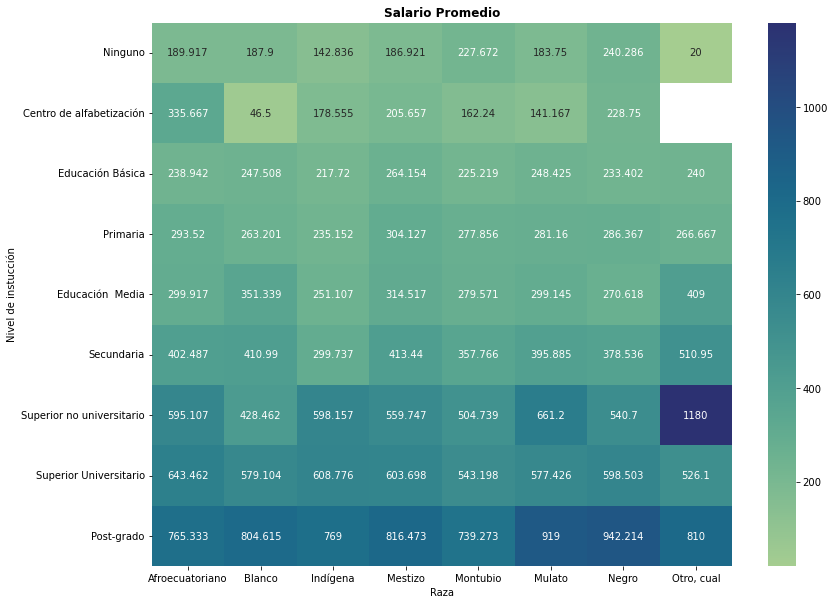

In [81]:
fig, ax = plt.subplots(figsize=(13,10))   
sns.heatmap(instr, annot=True, fmt='g', cmap="crest")
plt.title('Salario Promedio', weight='bold')
ax.set(xlabel="Raza", ylabel="Nivel de instucción")